<a href="https://colab.research.google.com/github/ArpitKadam/Attention-Is-All-You-Code/blob/main/LLM-from-Scratch/CHP_07_GPT_Model_Architecture_Bird_Eye_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTING A GPT MODEL FROM SCRATCH**

## **CONFIGS**

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias":True
}

In [ ]:
import torch.nn as nn

class DummyGPTModel(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.emb_token = nn.Embedding(cfg['vocab_size'], cfg['emb_dim'])
    self.pos_emb = nn.Embedding(cfg['context_length'], cfg['emb_dim'])
    self.drop_emb = nn.Dropout(cfg['drop_rate'])

    ## Use a placeholder of Transformer Block
    self.trf_block = nn.Sequential(
        *[DummyTransformerBlock(cfg) for _ in range(cfg['n_layers'])]
    )

    ## Use a placeholder for LayerNorm
    self.final_norm = DummyLayerNorm(cfg['emb_dim'])
    self.out_head = nn.Linear(cfg['emb_dim'], cfg['vocab_size'], bias=False)

  def forward(self, x):
    batch_size, seq_len = x.shape
    tok_emb = self.emb_token(x)
    pos_emb = self.pos_emb(torch.arange(seq_len, device=x.device))
    x = tok_emb + pos_emb
    x = self.drop_emb(x)
    x = self.trf_block(x)
    x = self.final_norm(x)
    logits = self.out_head(x)
    return logits


class DummyTransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    ## A simple Placeholder

  def forward(self, x):
    return x


class DummyLayerNorm(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    ## A simple Placeholder

  def forward(self, x):
    return x

## **STEP-1: TOKENIZATION**

In [ ]:
import tiktoken
import torch
tokenization  = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenization.encode(txt1)))
batch.append(torch.tensor(tokenization.encode(txt2)))
batch = torch.stack(batch, dim=0)

print("Batch:")
print(batch)
print()
print("Batch shape:", batch.shape)

Batch:
tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Batch shape: torch.Size([2, 4])


## **STEP-2: INSTANCE OF DUMMY GPT MODEL**

In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Logits shape:", logits.shape)
print("\nLogits: \n", logits)

Logits shape: torch.Size([2, 4, 50257])

Logits: 
 tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


## **STEP-3: LAYER OR BATCH NORMALIZATION**

In [ ]:
torch.manual_seed(123)
batch_eg = torch.randn(2, 4)
layer = nn.Sequential(nn.Linear(4, 6), nn.ReLU())
out = layer(batch_eg)
print("Batch shape:", batch_eg.shape)
print("Output shape:", out.shape)
print("Output: \n", out)

Batch shape: torch.Size([2, 4])
Output shape: torch.Size([2, 6])
Output: 
 tensor([[0.0000, 0.0000, 0.0000, 0.1585, 0.0000, 0.1680],
        [0.4252, 0.0000, 0.2041, 0.0000, 0.0000, 0.8094]],
       grad_fn=<ReluBackward0>)


In [ ]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:", mean)
print("Mean shape:", mean.shape)
print("\nVariance: \n", var)
print("Variance shape:", var.shape)

Mean: tensor([[0.0544],
        [0.2398]], grad_fn=<MeanBackward1>)
Mean shape: torch.Size([2, 1])

Variance: 
 tensor([[0.0071],
        [0.1065]], grad_fn=<VarBackward0>)
Variance shape: torch.Size([2, 1])


In [ ]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized output: \n", out_norm)
print("\nMean:", mean)
print("Mean shape:", mean.shape)
print("\nVariance: \n", var)
print("Variance shape:", var.shape)

Normalized output: 
 tensor([[-0.6451, -0.6451, -0.6451,  1.2343, -0.6451,  1.3460],
        [ 0.5680, -0.7347, -0.1093, -0.7347, -0.7347,  1.7453]],
       grad_fn=<DivBackward0>)

Mean: tensor([[ 0.0000],
        [-0.0000]], grad_fn=<MeanBackward1>)
Mean shape: torch.Size([2, 1])

Variance: 
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
Variance shape: torch.Size([2, 1])


In [ ]:
torch.set_printoptions(sci_mode=False)
print("Mean:", mean)
print("\nVariance: \n", var)

Mean: tensor([[ 0.0000],
        [-0.0000]], grad_fn=<MeanBackward1>)

Variance: 
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [ ]:
class LayerNormalization(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased=False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)
    return (self.scale * norm_x) + self.shift

In our variance calculation method, we have opted for an implementation detail by
setting unbiased=False.

For those curious about what this means, in the variance
calculation, we divide by the number of inputs n in the variance formula.

This approach does not apply Bessel's correction, which typically uses n-1 instead of n in
the denominator to adjust for bias in sample variance estimation.

This decision results in a so-called biased estimate of the variance.

For large-scale language
models (LLMs), where the embedding dimension n is significantly large, the
difference between using n and n-1 is practically negligible.

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it
reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.

In [ ]:
ln = LayerNormalization(batch_eg.shape[-1])
out = ln(batch_eg)
print("Normalized output: \n", out)

Normalized output: 
 tensor([[ 0.2145,  1.4954, -1.2119, -0.4980],
        [-0.9667,  1.6568, -0.5478, -0.1423]], grad_fn=<AddBackward0>)


In [ ]:
out_mean = out.mean(dim=-1, keepdim=True)
out_var = out.var(dim=-1, keepdim=True, unbiased=False)
print("Mean:", out_mean)
print("\nVariance: \n", out_var)

Mean: tensor([[0.0000],
        [0.0000]], grad_fn=<MeanBackward1>)

Variance: 
 tensor([[0.9997],
        [1.0000]], grad_fn=<VarBackward0>)


## **STEP-4: FEED-FORWARD NETWORK WITH GELU ACTIVATION**

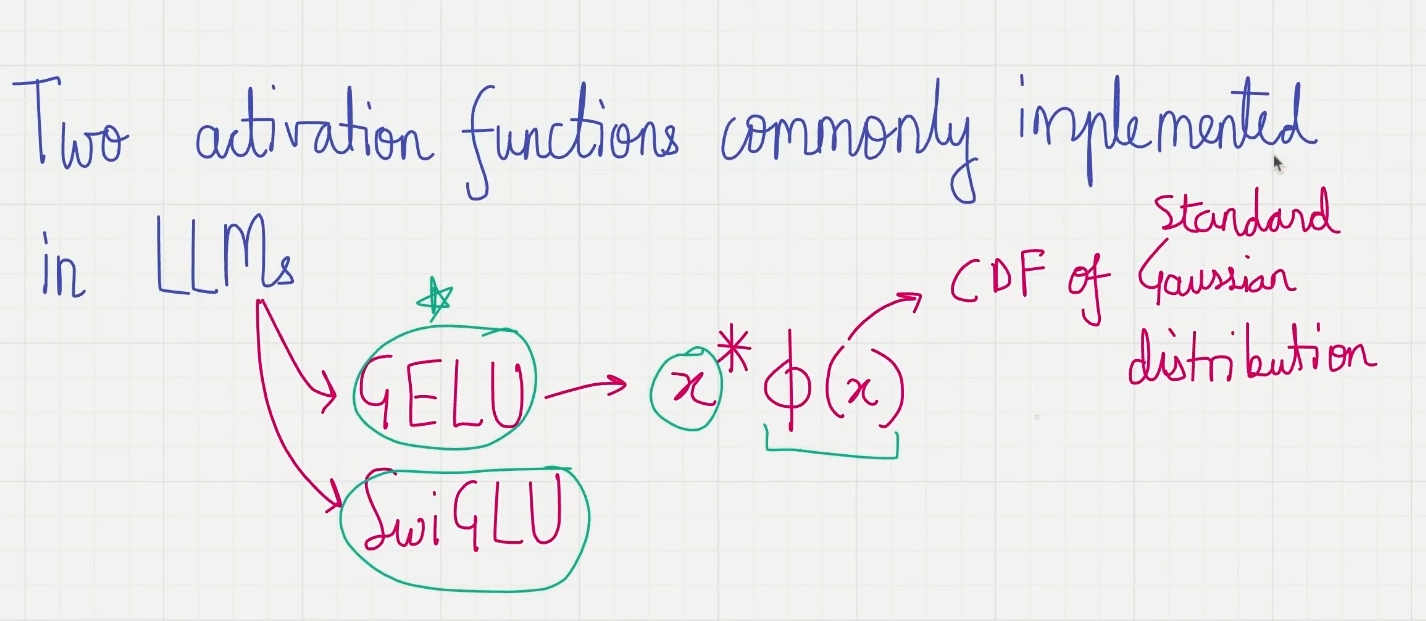

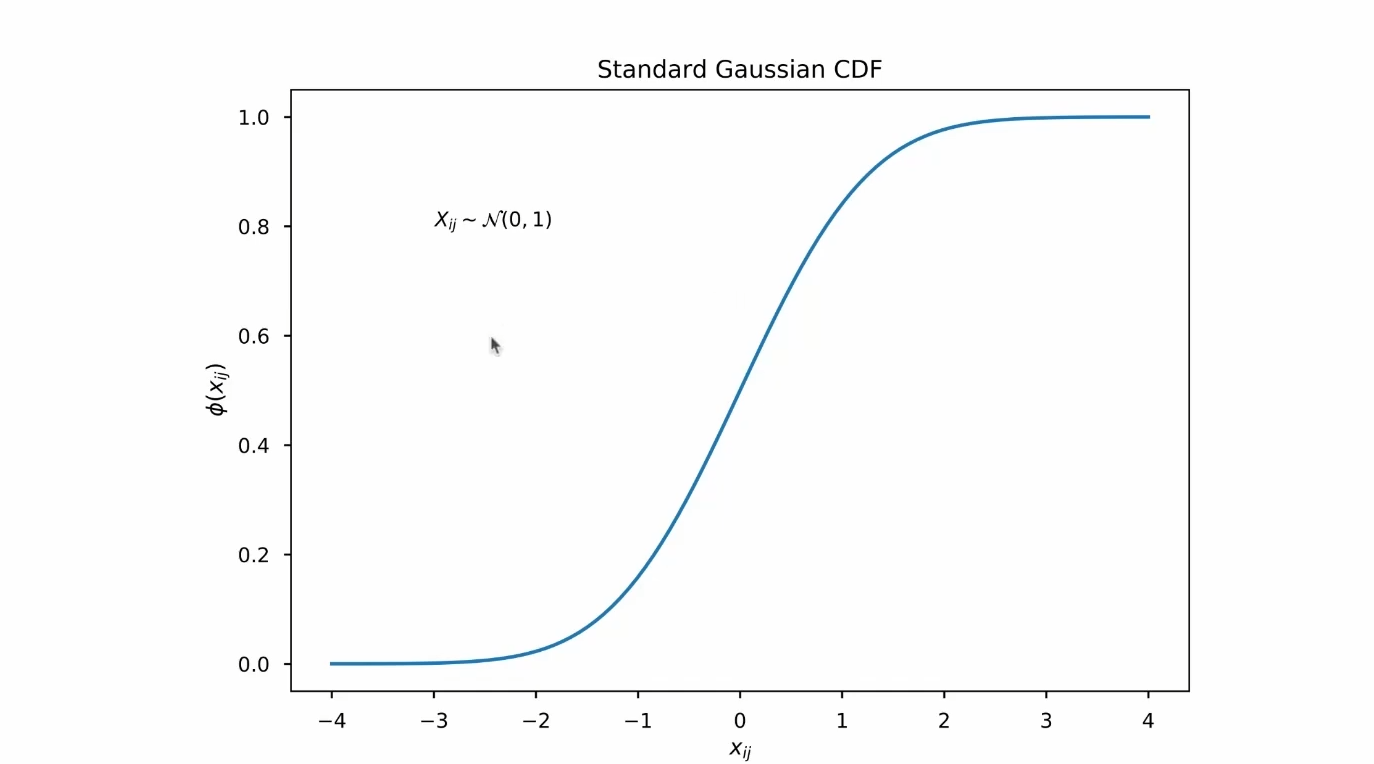

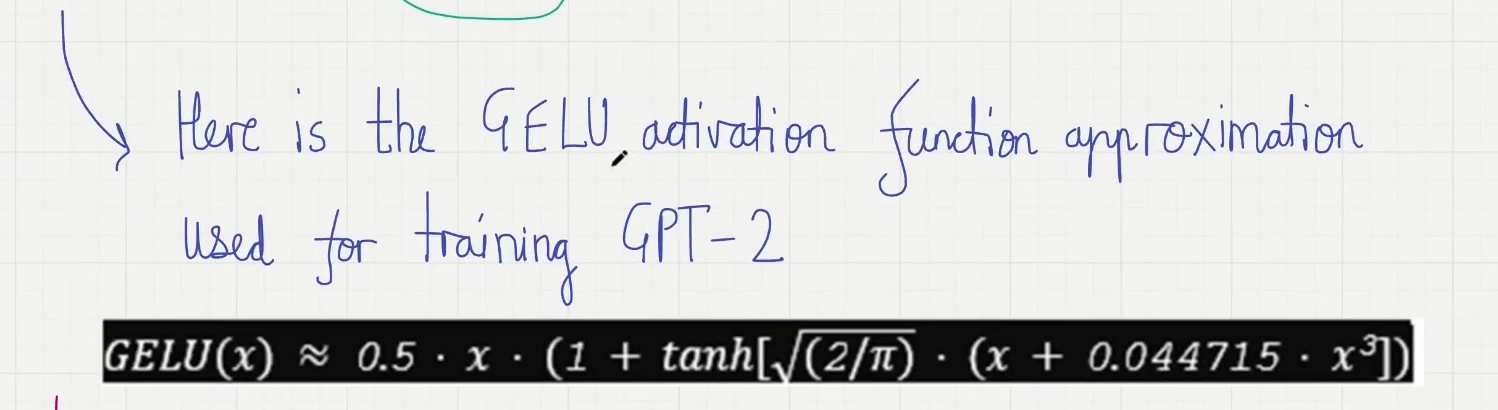

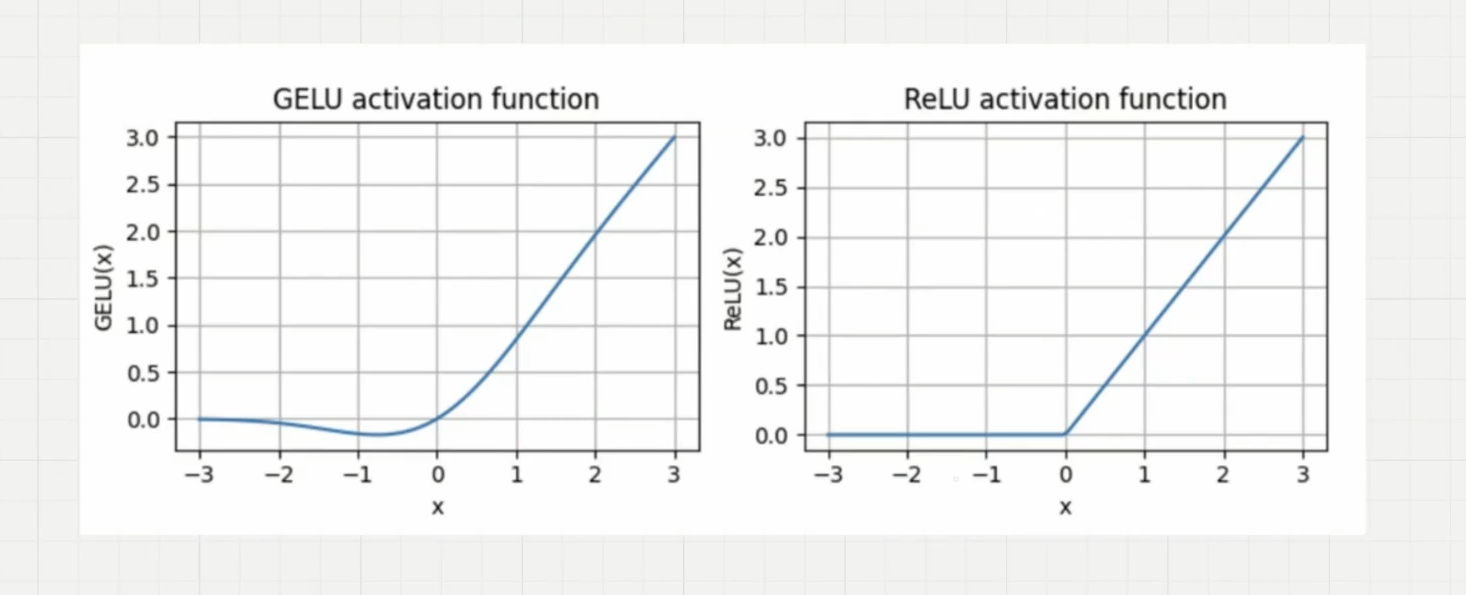

In [ ]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x * 0.044715 * torch.pow(x, 3))
    ))

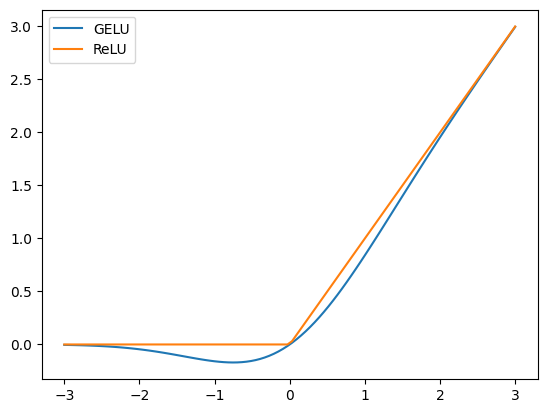

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = nn.GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.plot(x, y_gelu, label='GELU')
plt.plot(x, y_relu, label='ReLU')
plt.legend()
plt.show()

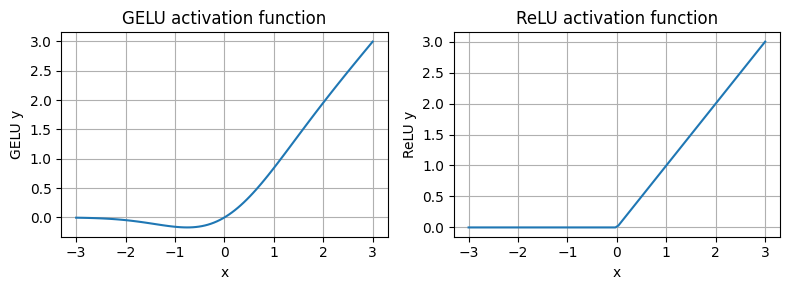

In [ ]:
plt.figure(figsize=(8, 3))
for i , (y, label) in enumerate(zip([y_gelu, y_relu], ['GELU', 'ReLU'])):
  plt.subplot(1, 2, i+1)
  plt.plot(x, y)
  plt.title(f"{label} activation function")
  plt.xlabel("x")
  plt.ylabel(f"{label} y")
  plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg['emb_dim'], 4 * cfg['emb_dim']),  ## Expansion of dimension from 768 to 3072
        GELU(),                                         ## Activation Layer
        nn.Linear(4 * cfg['emb_dim'], cfg['emb_dim'])   ## Contraction of dimension from 3072 to 768
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)
out = ffn(torch.rand(2, 3, 768))

print("Input shape:", torch.rand(2, 3, 768).shape)
print("Output shape:", out.shape)
print("\nOutput:", out)

Input shape: torch.Size([2, 3, 768])
Output shape: torch.Size([2, 3, 768])

Output: tensor([[[-0.0067,  0.0107, -0.1784,  ..., -0.0002, -0.0586, -0.0467],
         [-0.0315, -0.0097, -0.2678,  ..., -0.0222, -0.0206, -0.0374],
         [-0.1345,  0.0308, -0.3058,  ..., -0.0225, -0.1067,  0.0536]],

        [[ 0.0263,  0.0773, -0.1575,  ...,  0.0577,  0.0236,  0.0254],
         [-0.0075,  0.0413, -0.2184,  ...,  0.0710, -0.0532, -0.0379],
         [ 0.0036, -0.0295, -0.1982,  ..., -0.0867, -0.0599,  0.0559]]],
       grad_fn=<ViewBackward0>)


## **STEP-5: SKIP CONNECTIONS AND SHORTCUT CONNECTIONS**

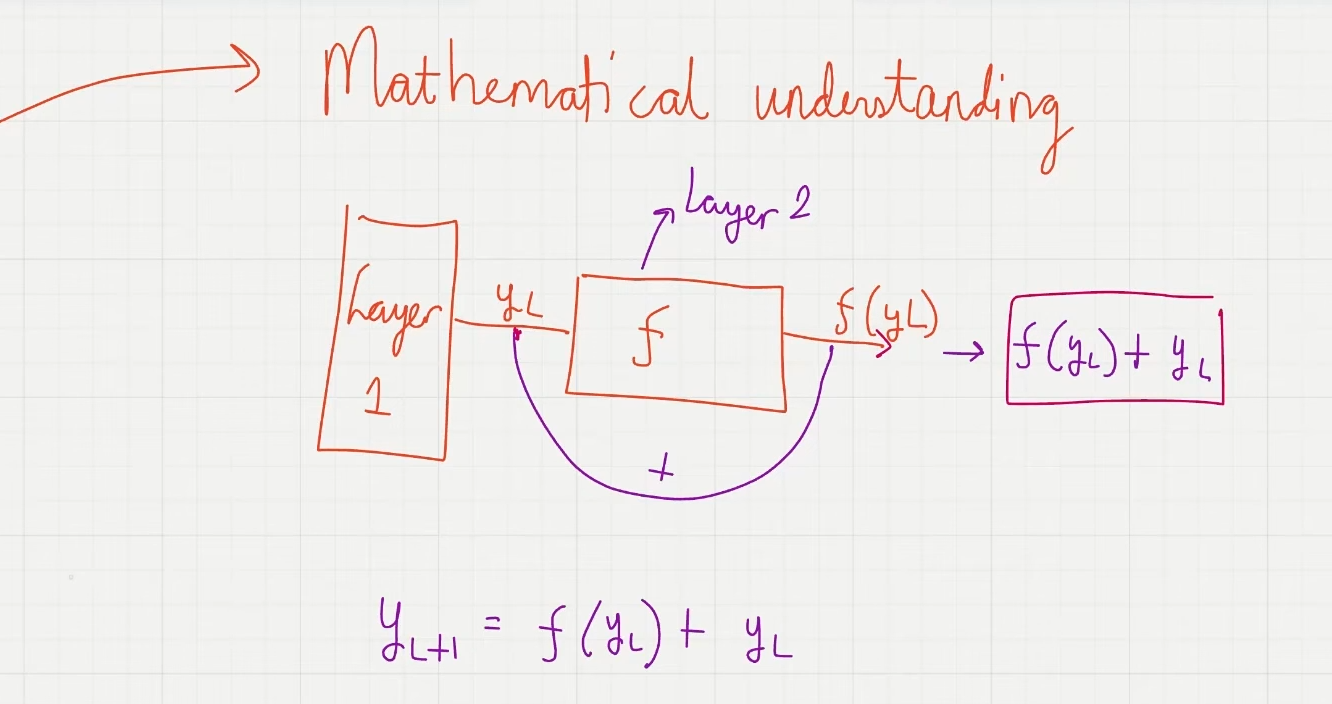

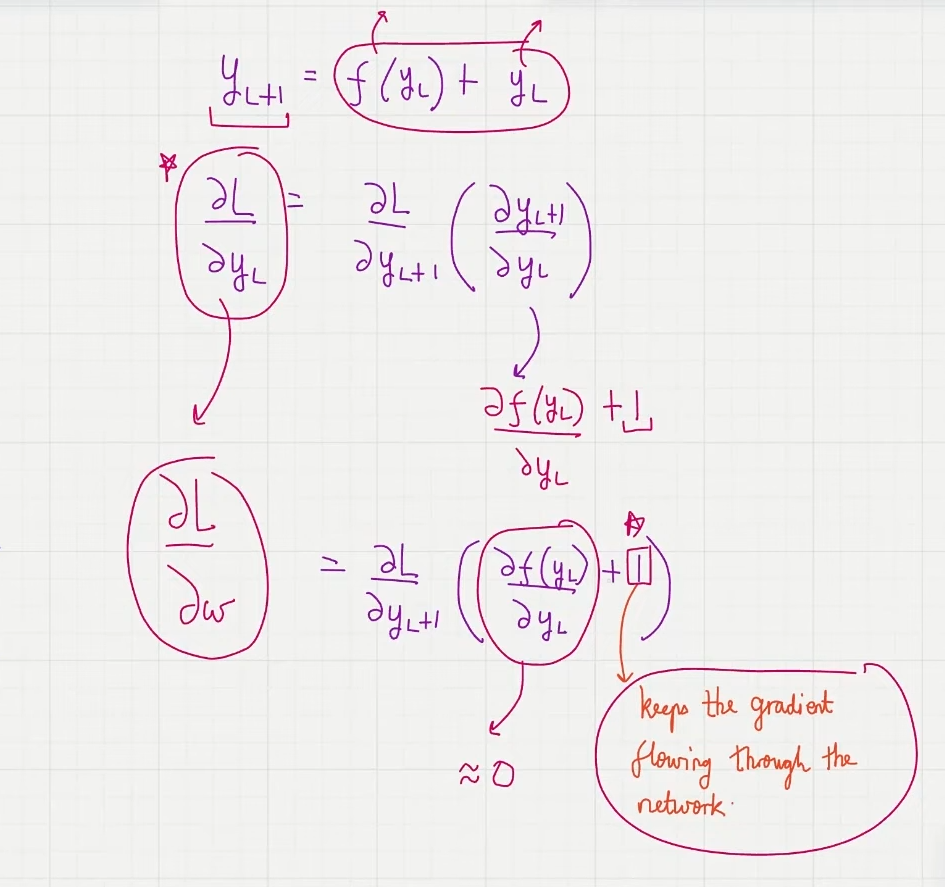

In [ ]:
class ExampleDeepNN(nn.Module):
  def __init__(self, layer_sizes, use_shortcut):
    super().__init__()
    self.use_shortcut = use_shortcut
    self.layers = nn.ModuleList([
        nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU()),
    ])

  def forward(self, x):
    for layer in self.layers:
      layer_out = layer(x)
      if self.use_shortcut and x.shape == layer_out.shape:
        x = x + layer_out
      else:
        x = layer_out
    return x

In [ ]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
print("Sample Input:")
print(sample_input)
print("Sample Input Shape: ", sample_input.shape)
torch.manual_seed(123)
model_witout_shortcut = ExampleDeepNN(layer_sizes, use_shortcut=False)
model_with_shortcut = ExampleDeepNN(layer_sizes, use_shortcut=True)

Sample Input:
tensor([[ 1.,  0., -1.]])
Sample Input Shape:  torch.Size([1, 3])


In [ ]:
def print_gradients(model, x):
  output = model(x)
  target = torch.tensor([[0.]])

  loss = nn.MSELoss()
  loss = loss(output, target)

  loss.backward()

  for name, param in model.named_parameters():
    if "weight" in name:
      print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [ ]:
print_gradients(model_witout_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00044766359496861696
layers.1.0.weight has gradient mean of 0.000254743208643049
layers.2.0.weight has gradient mean of 0.0011565007735043764
layers.3.0.weight has gradient mean of 0.003102813381701708
layers.4.0.weight has gradient mean of 0.010345105081796646


In [ ]:
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.09776214510202408
layers.1.0.weight has gradient mean of 0.1315603405237198
layers.2.0.weight has gradient mean of 0.08691665530204773
layers.3.0.weight has gradient mean of 0.08223401755094528
layers.4.0.weight has gradient mean of 0.569258987903595


## **STEP-6: FINAL TRANSFORMER BLOCK**

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias":True
}

In [ ]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased=False)
    norm_x = (x-mean) / torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift

class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))
    ))

class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg['emb_dim'], 4 * cfg['emb_dim']),
        GELU(),
        nn.Linear(4 * cfg['emb_dim'], cfg['emb_dim'])
    )

  def forward(self, x):
    return self.layers(x)

class MultiHeadAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, drop_rate, num_heads, qkv_bias):
    super().__init__()
    assert d_out % num_heads == 0, "d_out must be divisible by num_heads"

    ## Lets just say we take d_out = 6, batch_size = 2, d_out = 6, num_heads = 2, d_in = 6, num_tokens = 3

    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out // num_heads   ## Reduce the projection dim to match the desired output dim

    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)    ## Shape: (6, 6)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)      ## Shape: (6, 6)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)    ## Shape: (6, 6)
    self.out_proj = nn.Linear(d_out, d_out)    ## Linear Layer to combine head outputs
    self.dropout = nn.Dropout(drop_rate)
    self.register_buffer("simple_mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

  def forward(self, x):
    batch, num_tokens, d_in = x.shape      ## Shape: (2, 3, 6)

    keys = self.W_key(x)                 ## Shape: (2, 3, 6)
    queries = self.W_query(x)            ## Shape: (2, 3, 6)
    values = self.W_value(x)             ## Shape: (2, 3, 6)

    ## We implicitly split the matrix by adding a "num_heads" dimension
    ## Unroll last dim: (batch, num_tokens, d_out) -> (batch, num_tokens, num_heads, head_dim)
    keys = keys.view(batch, num_tokens, self.num_heads, self.head_dim)              ## Shape: (2, 3, 2, 3)
    queries = queries.view(batch, num_tokens, self.num_heads, self.head_dim)        ## Shape: (2, 3, 2, 3)
    values = values.view(batch, num_tokens, self.num_heads, self.head_dim)          ## Shape: (2, 3, 2, 3)

    ## Transpose: (batch, num_tokens, num_heads, head_dim) -> (batch, num_heads, num_tokens, head_dim)
    keys = keys.transpose(1, 2)            ## Shape: (2, 2, 3, 3)    (batch, num_heads, num_tokens, head_dim)
    queries = queries.transpose(1, 2)      ## Shape: (2, 2, 3, 3)    (batch, num_heads, num_tokens, head_dim)
    values = values.transpose(1, 2)        ## Shape: (2, 2, 3, 3)    (batch, num_heads, num_tokens, head_dim)

    ## Calculate attention scores with Causal Mask
    ## (batch, num_heads, num_tokens, head_dim) * (batch, num_heads, head_dim, num_tokens) = (batch, num_heads, num_tokens, num_tokens)
    ## Shape: (2, 2, 3, 3) * (2, 2, 3, 3) = (2, 2, 3, 3)
    attn_scores = torch.matmul(queries, keys.transpose(2, 3))

    attn_scores.masked_fill_(
        self.simple_mask.bool()[:num_tokens, :num_tokens],
        -torch.inf
    )

    attn_weights = torch.softmax(attn_scores / (keys.shape[-1] ** 0.5), dim=-1)    ## Shape: (2, 2, 3, 3)

    attn_weights = self.dropout(attn_weights)    ## Shape: (2, 2, 3, 3)

    ## Calculate context vector
    ## (batch, num_heads, num_tokens, num_tokens) * (batch, num_heads, num_tokens, head_dim) = (batch, num_heads, num_tokens, head_dim)
    ## Shape: (2, 2, 3, 3) * (2, 2, 3, 3) = (2, 2, 3, 3)
    context_vec = torch.matmul(attn_weights, values)    ## Shape: (2, 2, 3, 3)

    ## (batch, num_heads, num_tokens, head_dim) -> (batch, num_tokens, num_heads, head_dim)
    ## Shape: (2, 2, 3, 3) -> ## Shape: (2, 3, 2, 3)
    context_vec = context_vec.transpose(1, 2)    ## Shape: (2, 3, 2, 3)

    ## (batch, num_tokens, num_heads, head_dim) -> (batch, num_tokens, d_out)
    ## Shape: (2, 3, 2, 3) -> (2, 3, 6)
    context_vec = context_vec.contiguous().view(batch, num_tokens, self.d_out)

    context_vec = self.out_proj(context_vec)    ## Shape: (2, 3, 6) * (6, 6) = (2, 3, 6)

    return context_vec

In [ ]:
class TransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.attn = MultiHeadAttention(
        d_in = cfg['emb_dim'],
        d_out = cfg['emb_dim'],
        context_length = cfg['context_length'],
        num_heads = cfg['n_heads'],
        qkv_bias = cfg['qkv_bias'],
        drop_rate = cfg['drop_rate']
      )
    self.ff = FeedForward(cfg)
    self.norm1 = LayerNorm(cfg['emb_dim'])
    self.norm2 = LayerNorm(cfg['emb_dim'])
    self.drop_shortcut = nn.Dropout(cfg['drop_rate'])

  def forward(self, x):
    ## Connection for attention block
    shortcut = x
    x = self.norm1(x)
    x = self.attn(x)
    x = self.drop_shortcut(x)
    x = x + shortcut

    ## Conection for feed forward block
    shortcut = x
    x = self.norm2(x)
    x = self.ff(x)
    x = self.drop_shortcut(x)
    x = x + shortcut

    return x

In [ ]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
transformer_block = TransformerBlock(GPT_CONFIG_124M)
output = transformer_block(x)

In [ ]:
print("Input:\n", x)
print("\nInput Shape:", x.shape)
print("\nOutput:\n", output)
print("\nOutput Shape:", output.shape)

Input:
 tensor([[[0.2961, 0.5166, 0.2517,  ..., 0.9541, 0.8567, 0.4604],
         [0.2238, 0.3047, 0.3019,  ..., 0.5465, 0.4532, 0.7598],
         [0.6945, 0.2478, 0.4111,  ..., 0.8838, 0.4898, 0.5963],
         [0.0890, 0.7804, 0.9223,  ..., 0.4507, 0.6357, 0.5833]],

        [[0.5716, 0.9297, 0.3396,  ..., 0.0477, 0.4564, 0.2797],
         [0.0936, 0.2211, 0.3806,  ..., 0.3948, 0.4545, 0.4536],
         [0.6788, 0.1741, 0.2084,  ..., 0.5557, 0.5930, 0.0959],
         [0.3894, 0.4083, 0.0662,  ..., 0.9861, 0.9341, 0.1319]]])

Input Shape: torch.Size([2, 4, 768])

Output:
 tensor([[[ 0.6468,  0.0257,  0.2121,  ...,  0.0012,  0.5994,  0.5387],
         [ 0.4855,  0.3047,  0.3796,  ..., -0.0789,  0.2934,  1.0148],
         [ 0.6790,  0.0579,  0.6384,  ...,  0.2489,  0.3490,  0.7878],
         [-0.1144,  0.2124,  0.5987,  ...,  0.3825,  0.4223,  0.7531]],

        [[ 0.5198,  0.3303,  0.2583,  ..., -0.2787,  0.0261,  0.6150],
         [-0.1670, -0.0859,  0.0807,  ..., -0.1153,  0.2111,  1